# <span style="color: red">Главы 1, 2 и 9 - Введение в курс

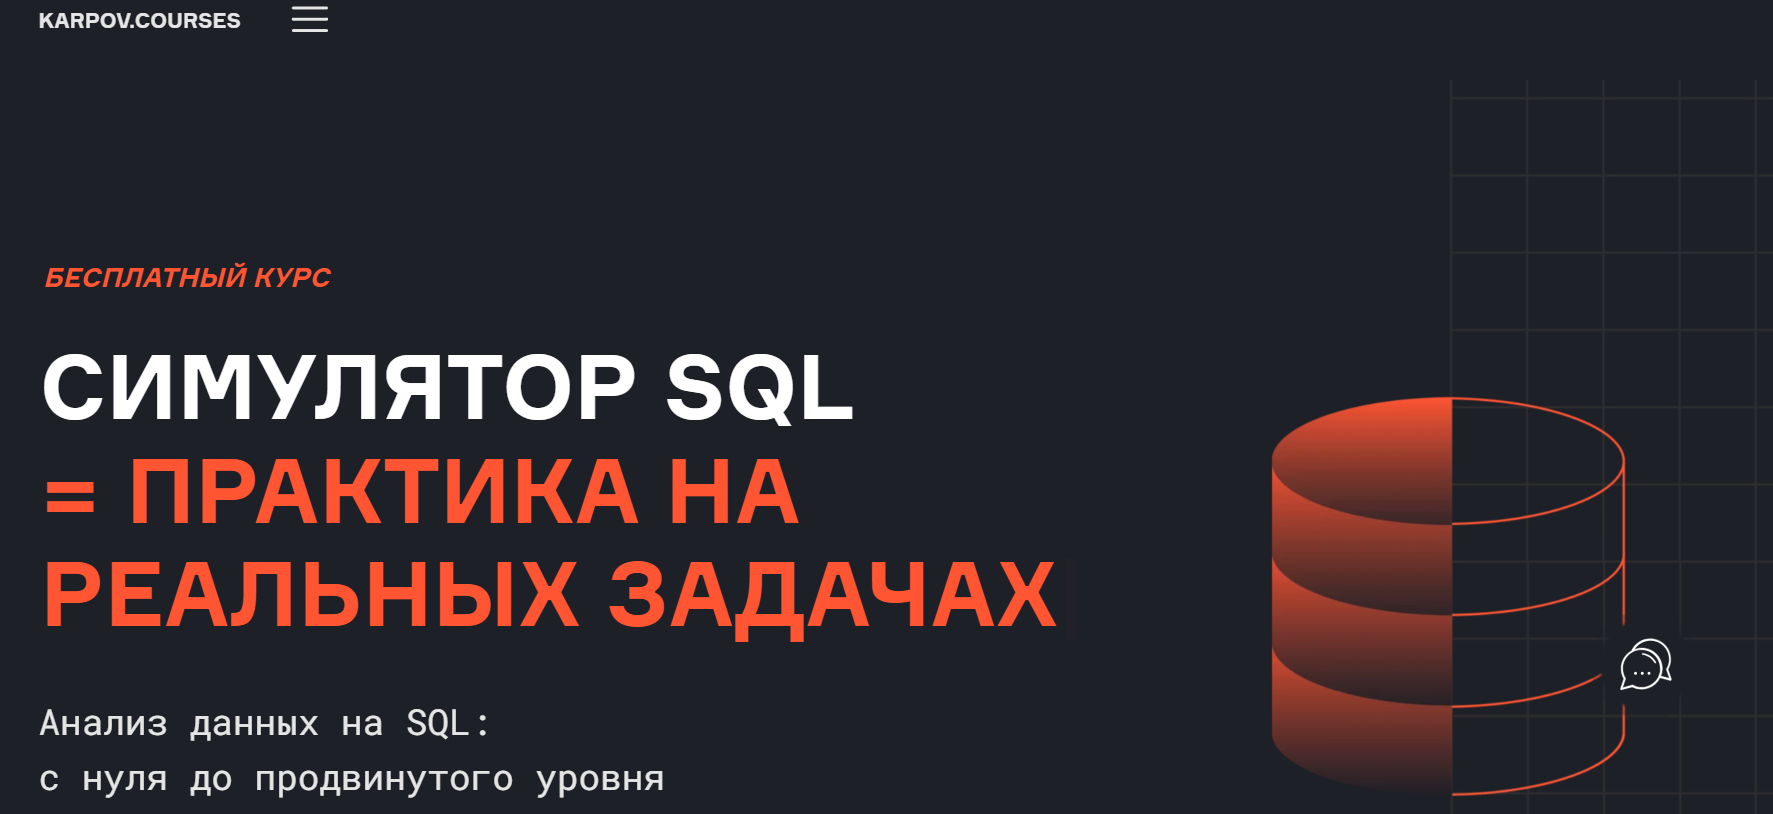

# [SQL Style Guide](https://www.sqlstyle.guide)
# [SQL Formatter](https://codebeautify.org/sqlformatter#google_vignette)
# [PostgreSQL Tutorial](https://www.postgresqltutorial.com)

### Вы будете учиться переводить запросы с языка бизнеса на язык аналитики, формулировать и проверять гипотезы, визуализировать результаты анализа и строить интерактивные дашборды.

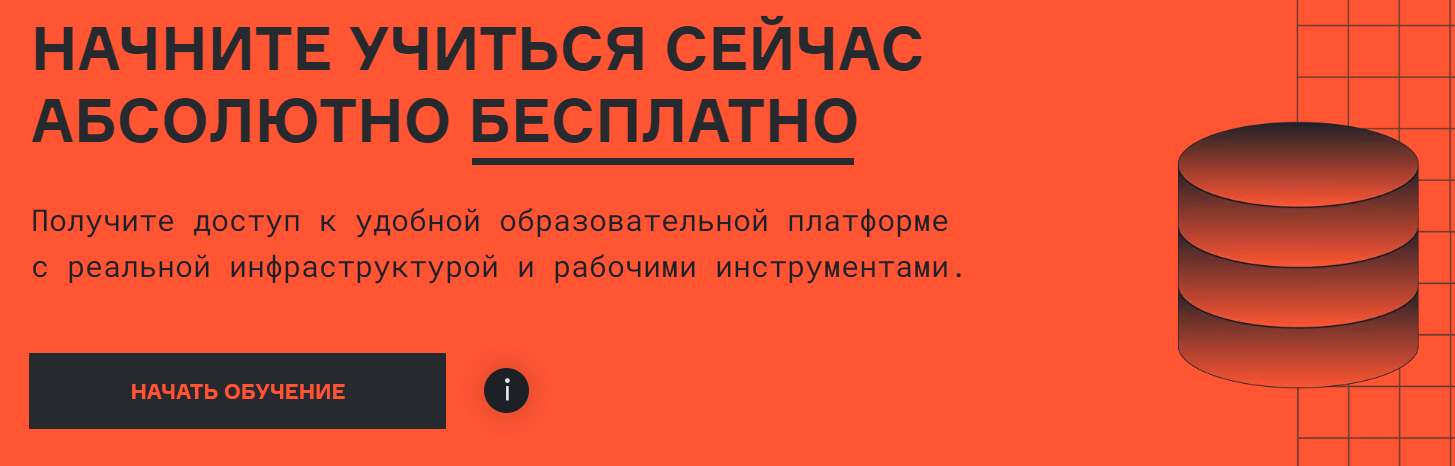

### Ниже представлена архитектура хранилища данных

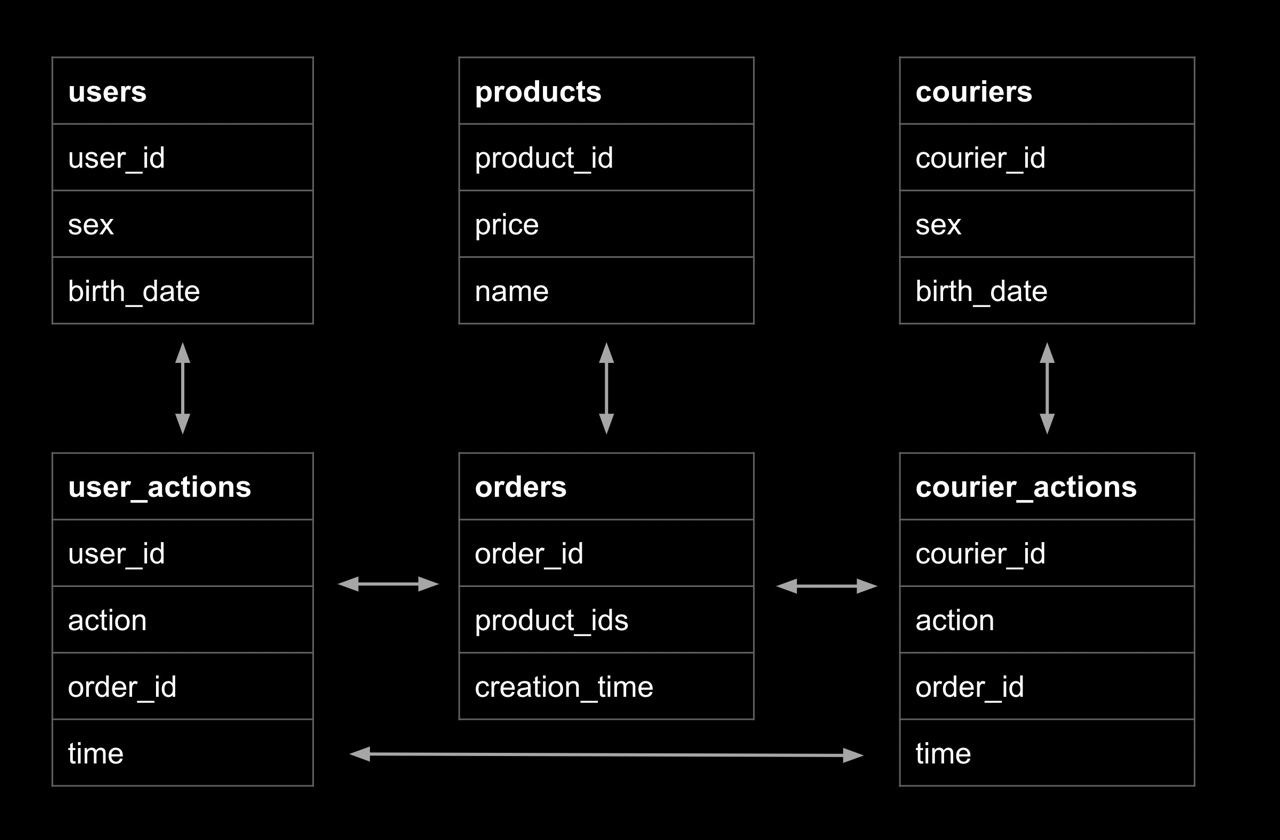

# База данных для курса

## 👨‍💻 user_actions — user actions with orders.

| Column   | Data Type   | Description                                                            |
|----------|-------------|------------------------------------------------------------------------|
| user_id  | INT         | user id                                                                |
| order_id | INT         | order id                                                               |
| action   | VARCHAR(50) | user action with order; 'create_order' — order creation, 'cancel_order' — order cancellation |
| time     | TIMESTAMP   | time of action                                                         |

## 👨‍💻 courier_actions — courier actions with orders.

| Column     | Data Type   | Description                                                          |
|------------|-------------|----------------------------------------------------------------------|
| courier_id | INT         | courier id                                                           |
| order_id   | INT         | order id                                                             |
| action     | VARCHAR(50) | courier action with order; 'accept_order' — order acceptance, 'deliver_order' — order delivery |
| time       | TIMESTAMP   | time of action                                                       |

## 👨‍💻 orders — order information.

| Column        | Data Type   | Description                        |
|---------------|-------------|------------------------------------|
| order_id      | INT         | order id                           |
| creation_time | TIMESTAMP   | order creation time                |
| product_ids   | integer[]   | list of product ids in the order   |

## 👨‍💻 users - user information.

| Column      | Data Type   | Description                              |
|-------------|-------------|------------------------------------------|
| user_id     | INT         | User ID                                  |
| birth_date  | DATE        | Date of birth                            |
| sex         | VARCHAR(50) | Gender; 'male' — male, 'female' — female |

## 👨‍💻 couriers - courier information.

| Column      | Data Type   | Description                              |
|-------------|-------------|------------------------------------------|
| courier_id  | INT         | Courier ID                               |
| birth_date  | DATE        | Date of birth                            |
| sex         | VARCHAR(50) | Gender; 'male' — male, 'female' — female |

## 👨‍💻 products - product information.

| Column      | Data Type   | Description          |
|-------------|-------------|----------------------|
| product_id  | INT         | Product ID           |
| name        | VARCHAR(50) | Product name         |
| price       | FLOAT(4)    | Product price        |

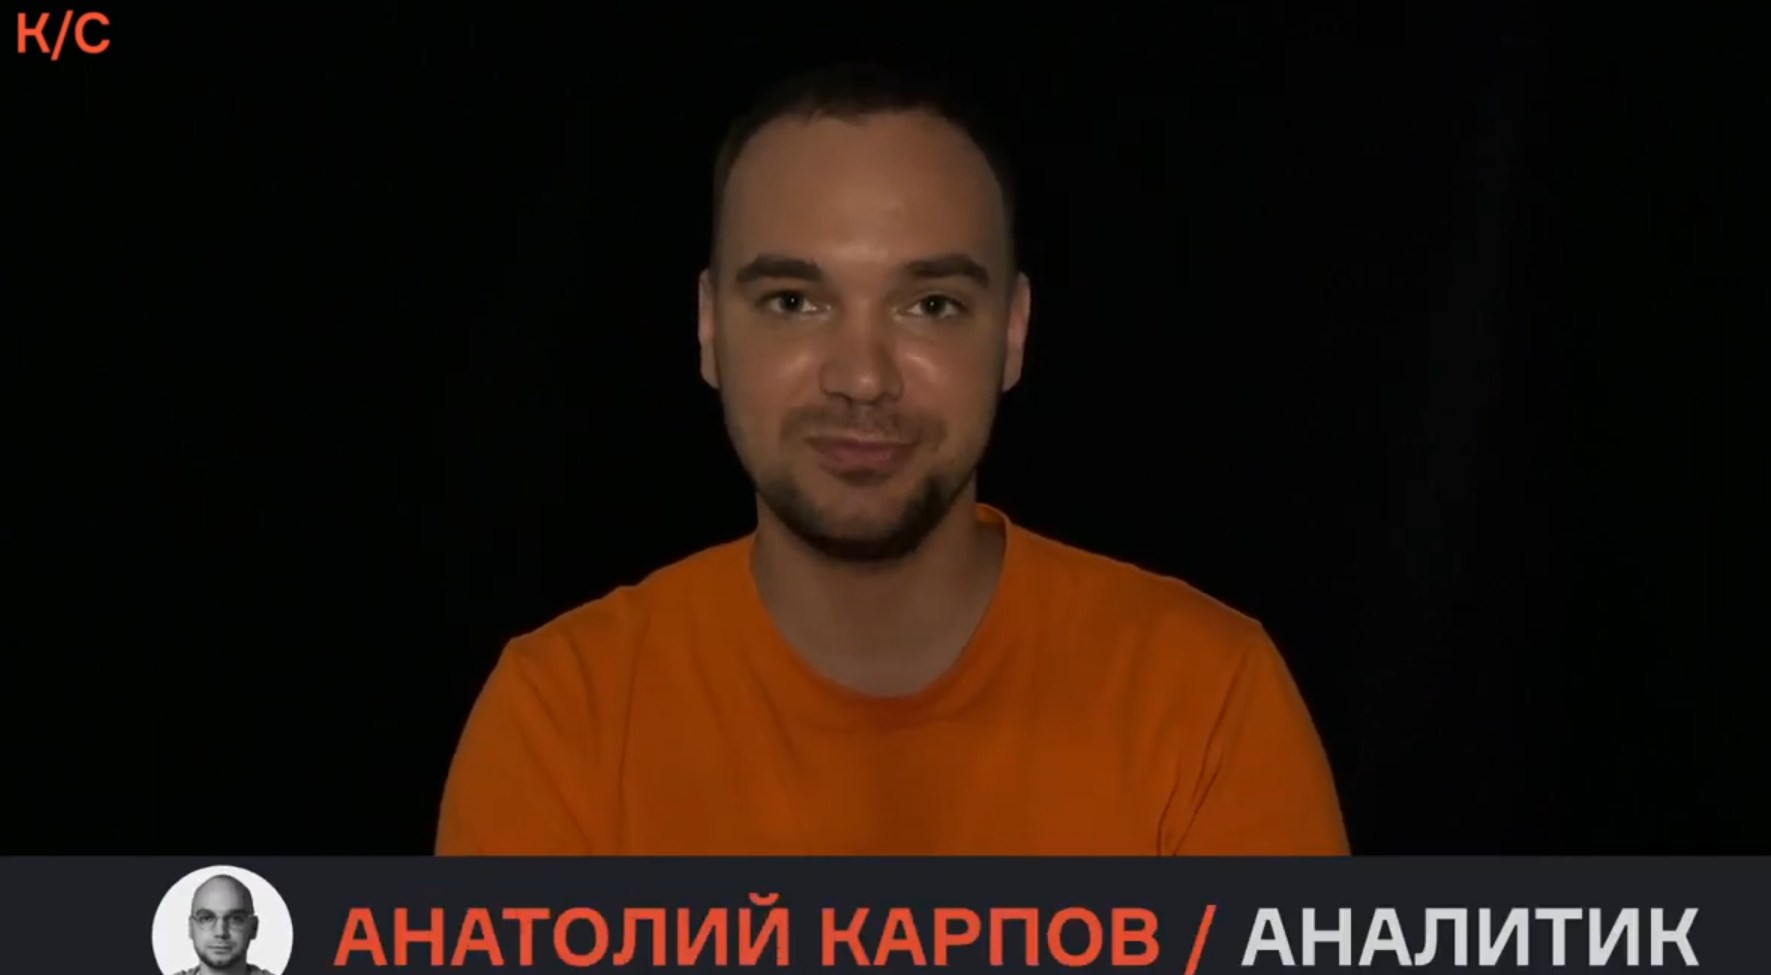

# <span style="color: red">Глава 3 - Базовые запросы SQL

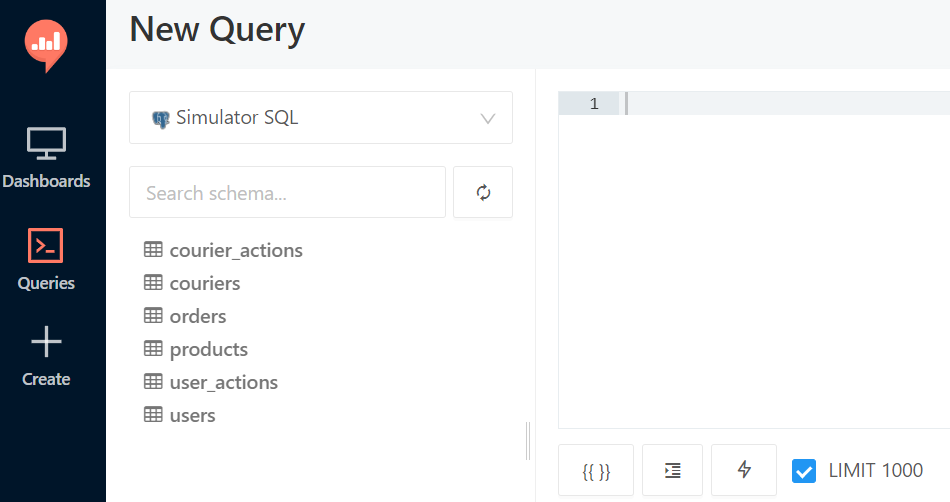

### Чтобы не ждать часами пока вся таблица с миллионами строк будет выполнена, пишите в конце SQL-запроса LIMIT 10. Первых десяти строк будет достаточно, чтобы увидеть с какими данными мы имеем дело

### Redash - это веб-интерфейс, который позволяет удобнее работать с запросами

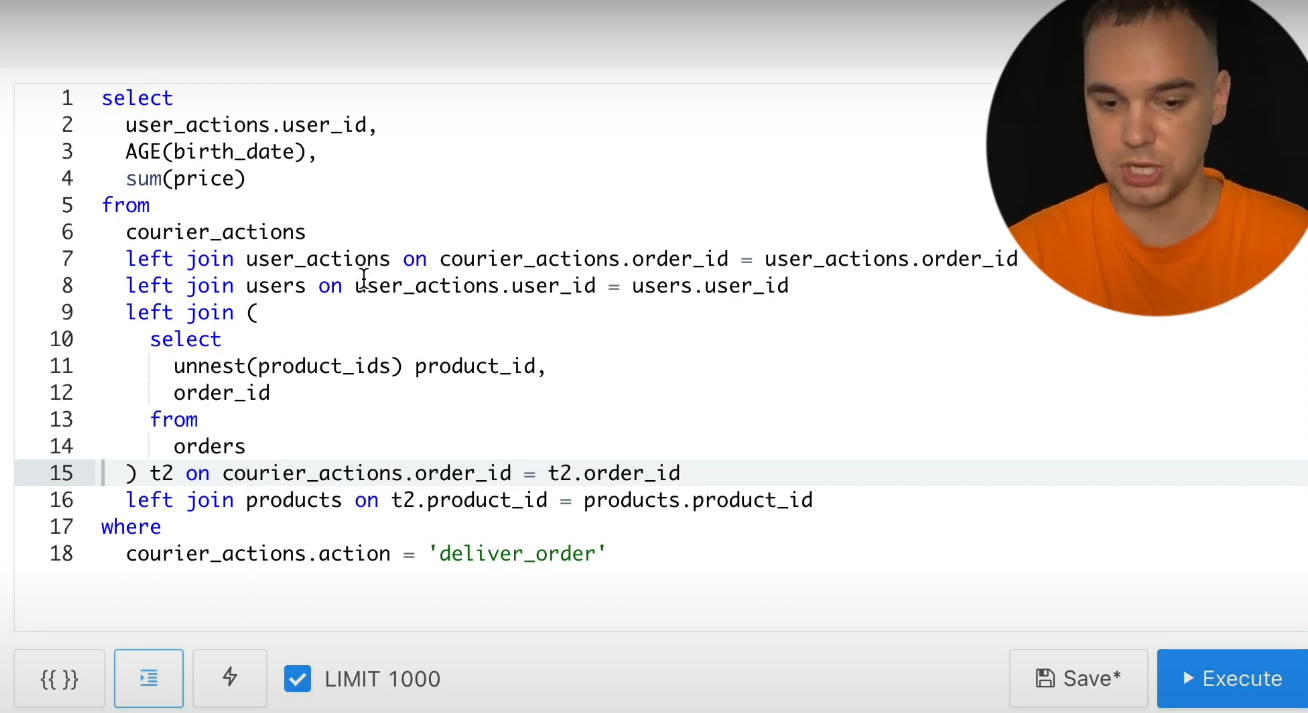
### В Redash можно автоматически отформатировать запрос для лучшей читаемости

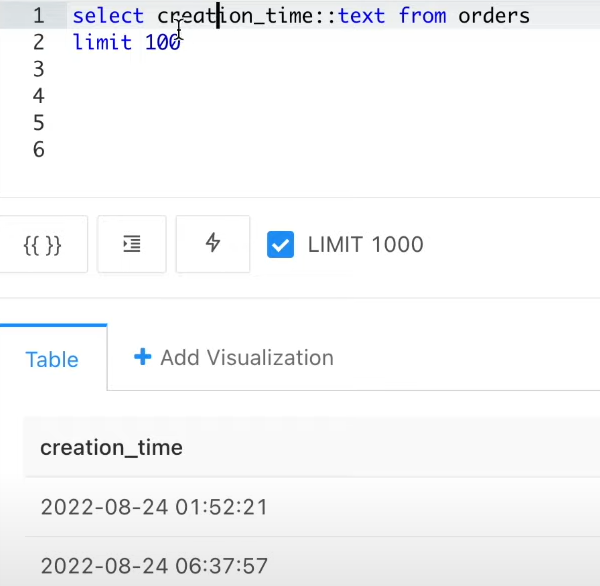
### ::text явно переводит формат даты в текстовый

### Нужно уметь язык бизнеса первести на язык запросов (SQL). В реальности требования будут оглашать без уточнения на детали

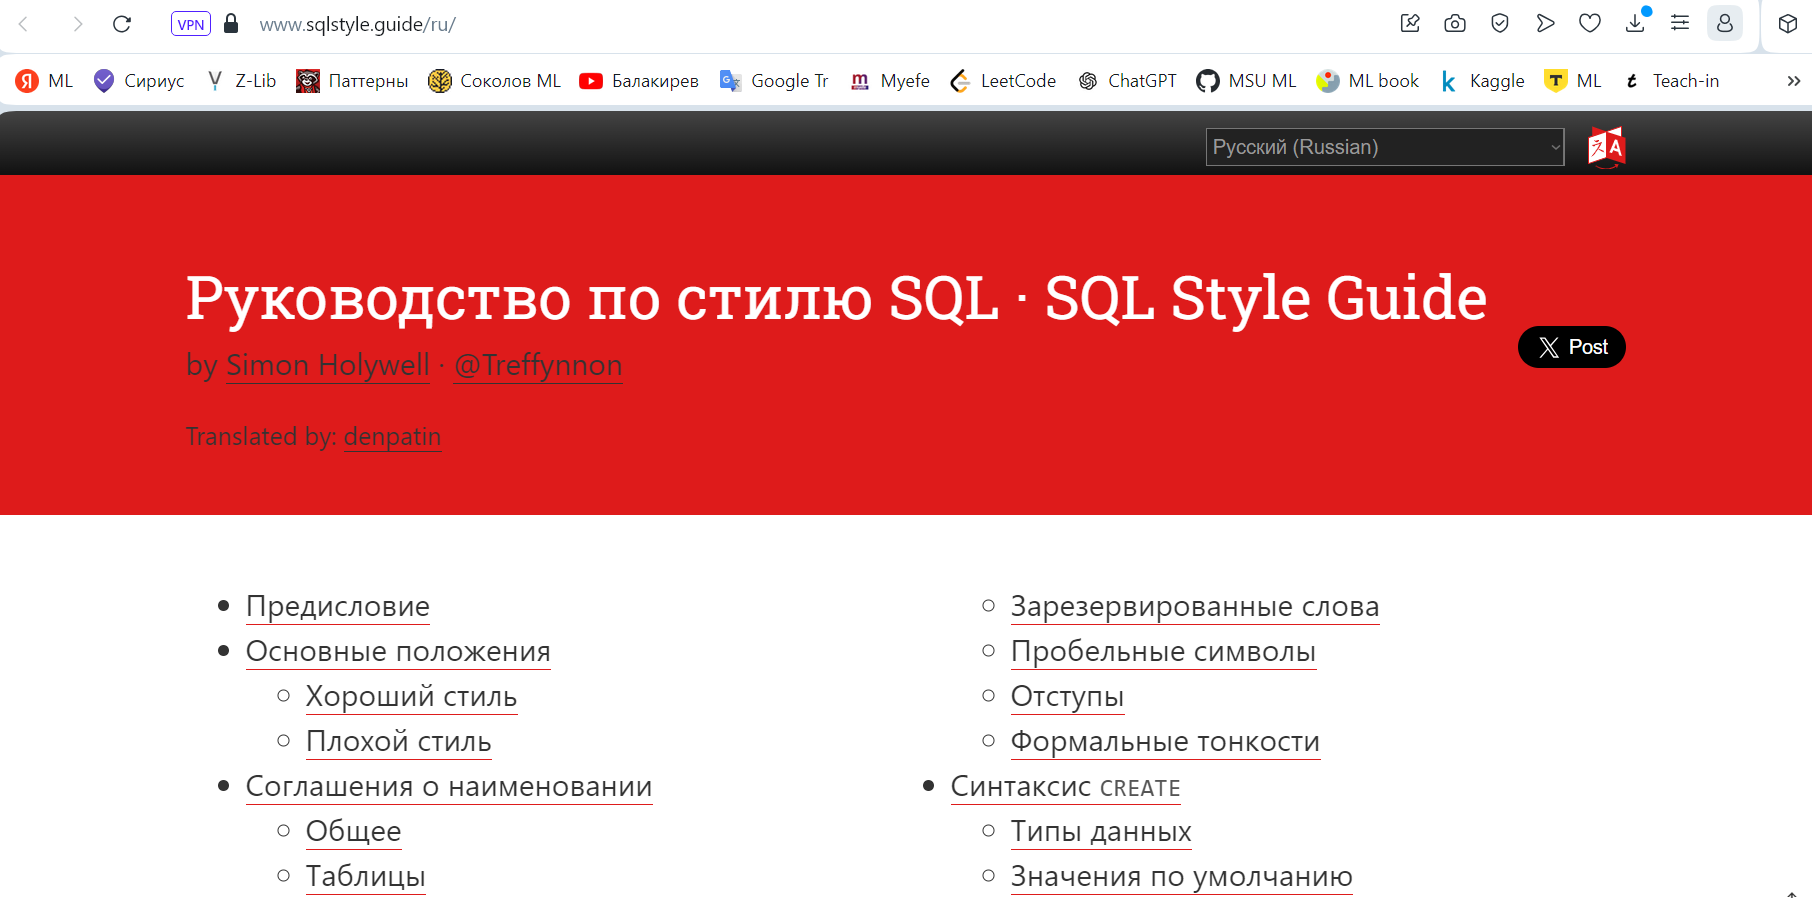

# [Руководство по стилю SQL · SQL Style Guide](https://www.sqlstyle.guide/ru/)

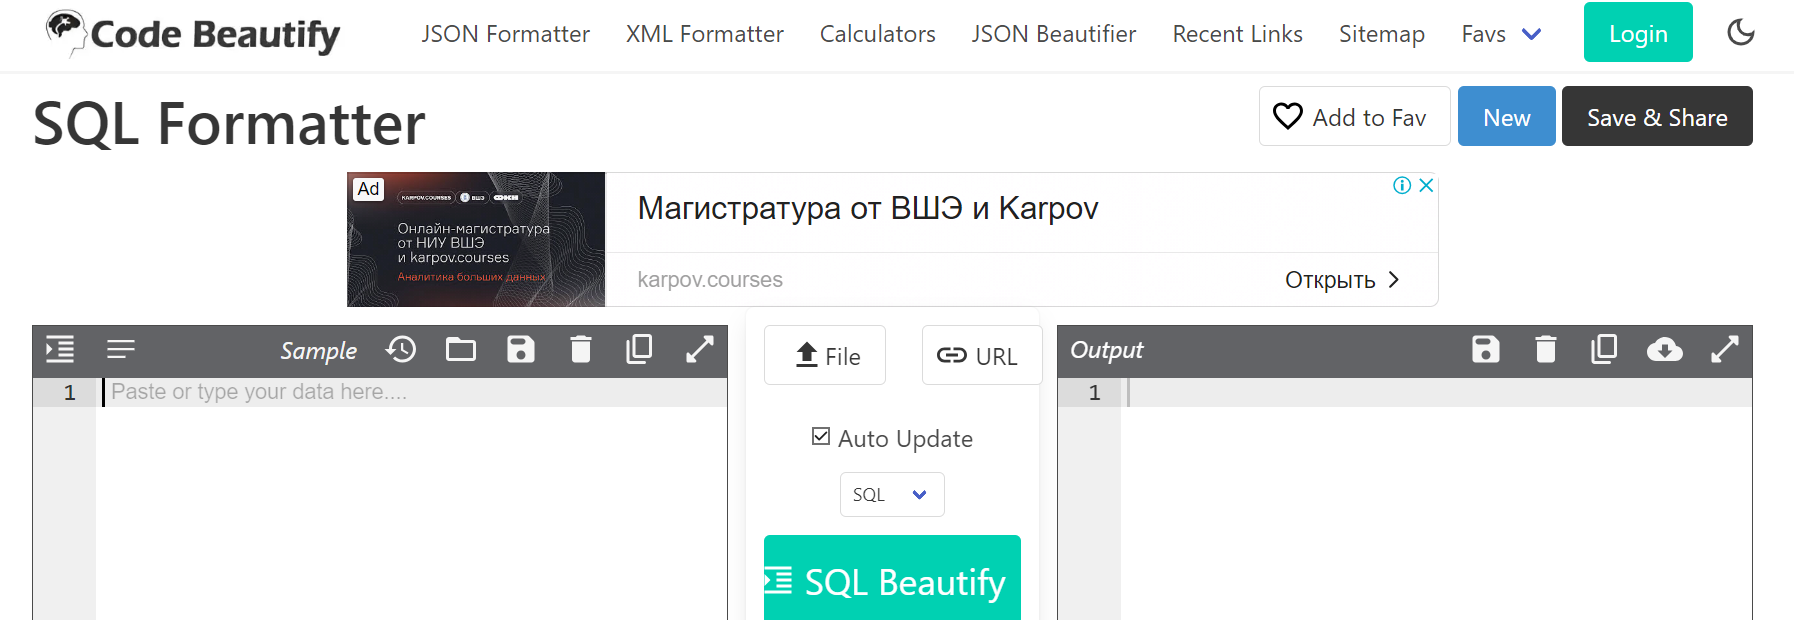

# [SQL Formatter](https://codebeautify.org/sqlformatter#google_vignette)

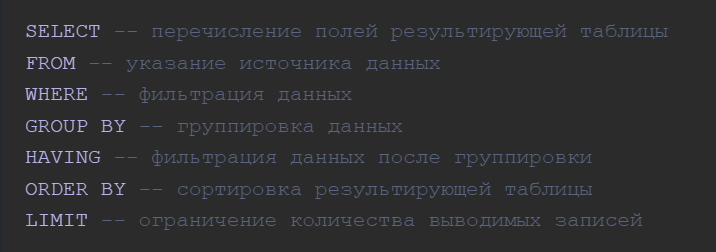

### Прежде чем просить помощи, попробуйте много раз сами и приведите пример что Вы пробовали и какую ошибку возвращает система. Вопрос должен содержать больше деталей по тому что Вы смогли сделать сами и на каком этапе начало не получаться.

# <span style="color: red">Task 1:</span>
#### List all records from the products table.
#### Fields in the resulting table: **product_id, name, price**
```SQL
SELECT
  product_id,
  name,
  price
FROM
  products;
```

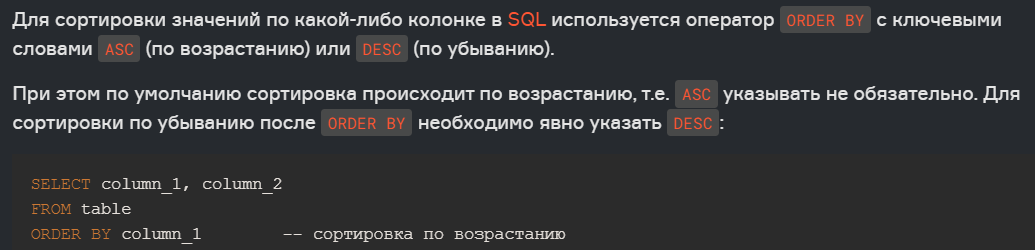

# <span style="color: red">Task 2:</span>
#### Display all records from the products table, sorting them by product names in alphabetical order, i.e. Ascending. To sort, use the ORDER BY operator.
#### Fields in the resulting table: **product_id, name, price**
```SQL
SELECT
  *
FROM
  products
ORDER BY
  name ASC;
```

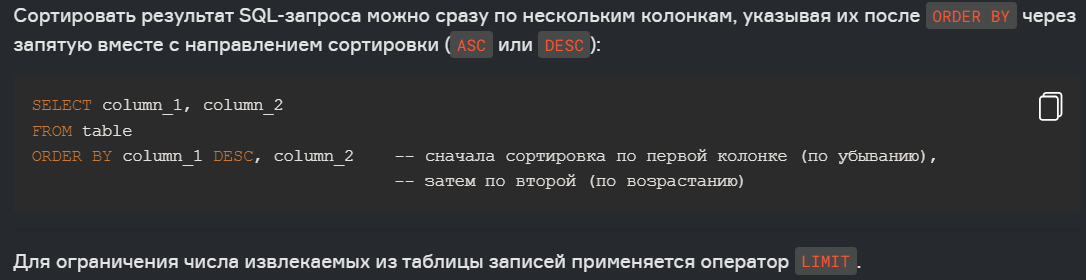

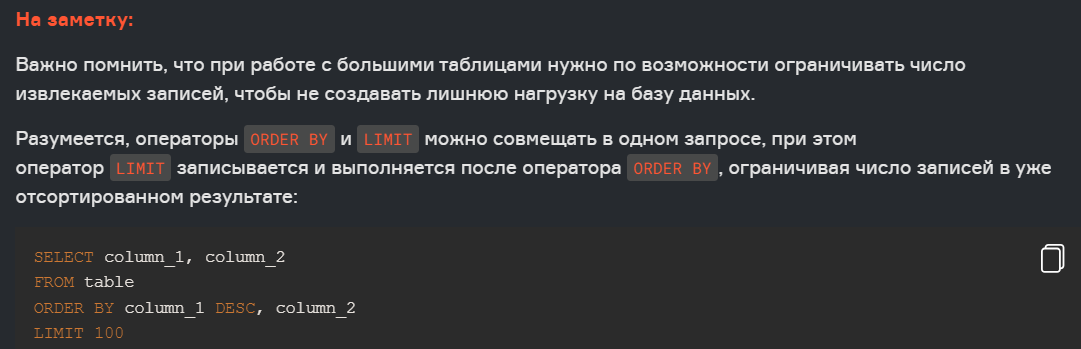

# <span style="color: red">Task 3:</span>
#### Sort the courier_actions table first by the courier_id column, ascending by courier id, then by the action column (in ascending order again), and then by the time column, but in descending order - from the most recent action to the very first. Don't forget to include the order_id column in the result.
#### Add a LIMIT operator to your query and print only the first 1000 rows of the resulting table.
#### Fields in the resulting table: **courier_id, order_id, action, time**
```SQL
SELECT
  courier_id,
  order_id,
  action,
  time
FROM
  courier_actions
ORDER BY
  courier_id ASC,
  action ASC,
  time DESC
LIMIT
  1000;
```

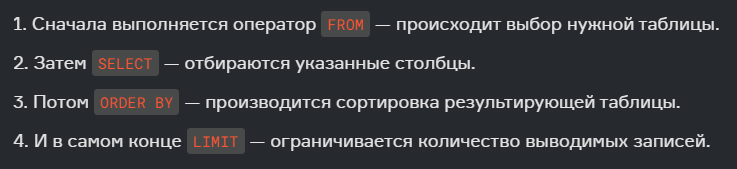

# <span style="color: red">Task 4:</span>
#### Using the SELECT, FROM, ORDER BY and LIMIT statements, determine the 5 most expensive products in the products table that our service delivers. Print their names and prices.
#### Fields in the resulting table: **name, price**
```SQL
SELECT
  name,
  price
FROM
  products
ORDER BY
  price DESC
LIMIT
  5;
```

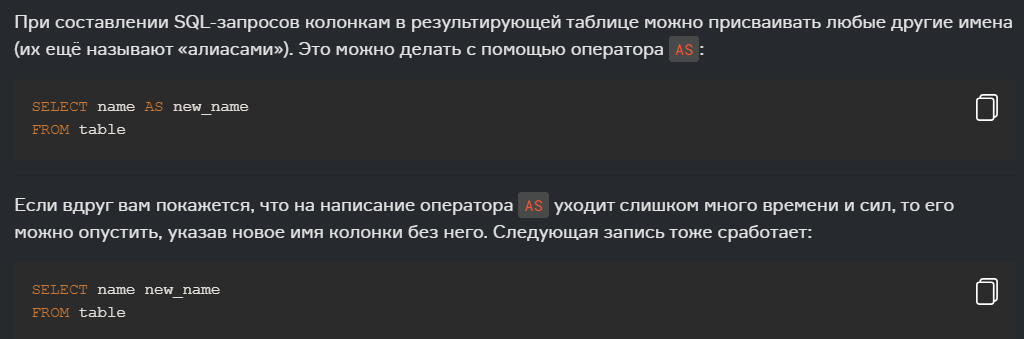

# <span style="color: red">Task 5:</span>
#### Repeat the request from the previous task, but now rename the name and price columns to product_name and product_price, respectively.
#### Fields in the resulting table: **product_name, product_price**
```SQL
SELECT
  name AS product_name,
  price AS product_price
FROM
  products
ORDER BY
  price DESC
LIMIT
  5;
```

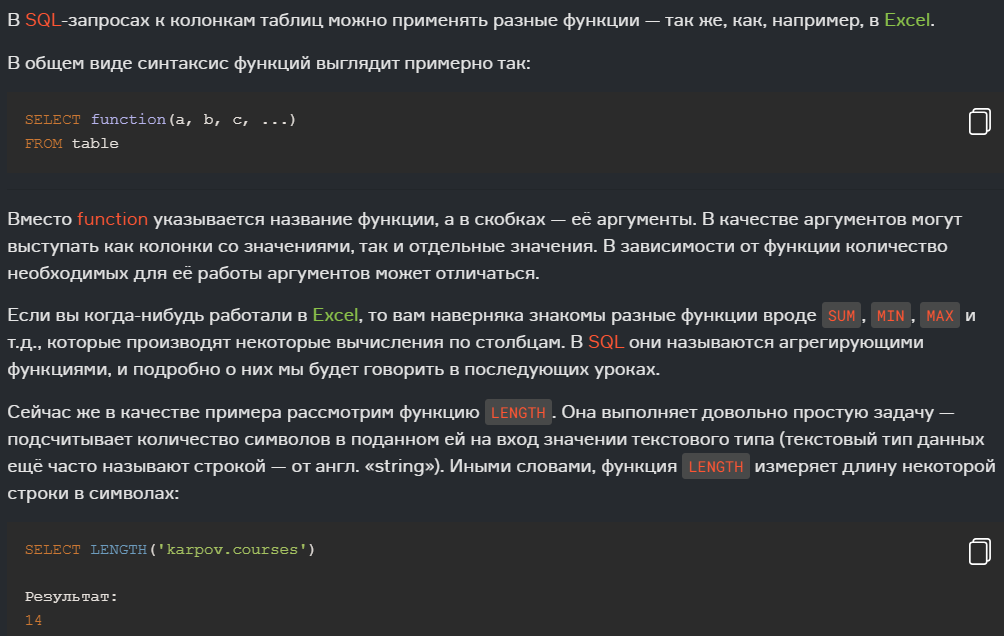

# <span style="color: red">Task 6:</span>
#### Using the SELECT, FROM, ORDER BY, and LIMIT statements and the LENGTH function, determine the product with the longest name in the products table. Display its name, the length of the name in characters, and the price of this product. Name the column with the length of the name in characters name_length.
#### Fields in the resulting table: **name, name_length, price**
```SQL
SELECT
  name,
  LENGTH(name) AS name_length,
  price
FROM
  products
ORDER BY
  name_length DESC
LIMIT
  1;
```

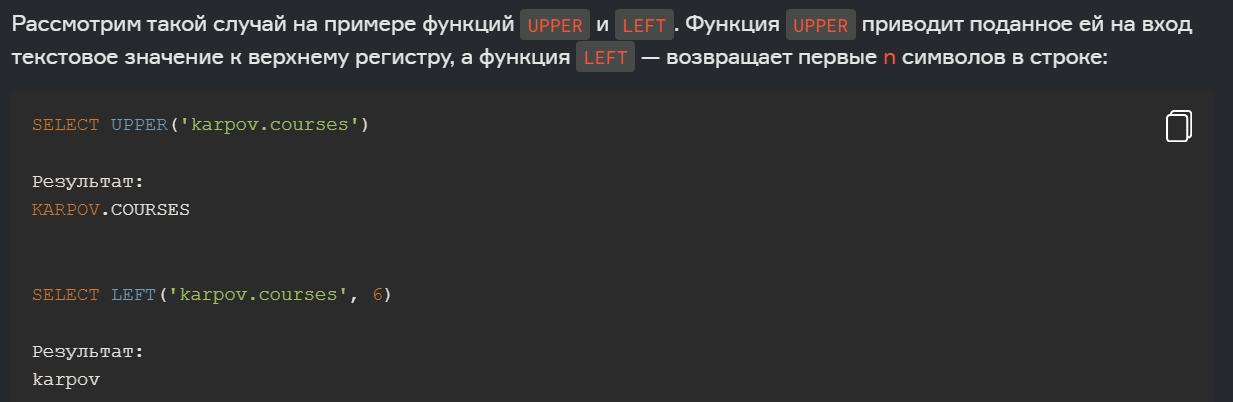
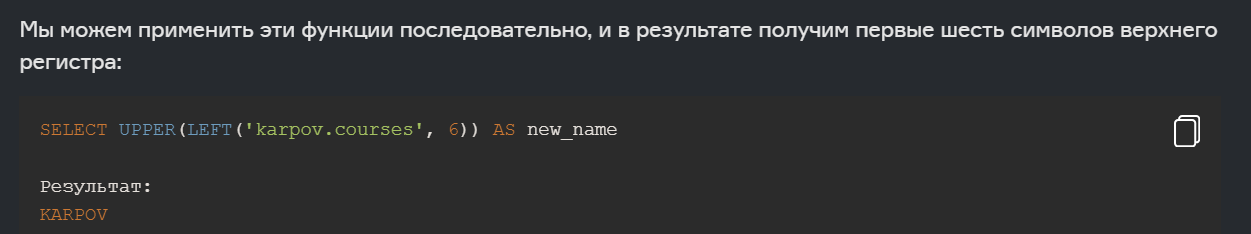

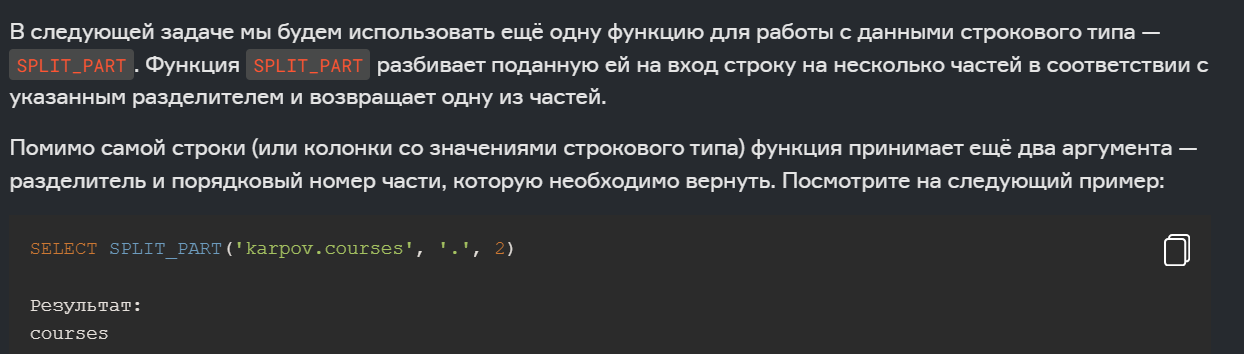

# <span style="color: red">Task 7:</span>
#### Apply the UPPER and SPLIT_PART functions successively to the name column and transform the names of the products in the products table so that only the first word, written in uppercase, remains of the names. Call the column with a new name consisting of the first word first_word.
#### As a result, include the original product names, the new names from the first word, and the price of the products. Sort the result in ascending order of the original product name in the name column.
#### Fields in the resulting table: **name, first_word, price**
```SQL
SELECT
  name,
  UPPER(SPLIT_PART(name, ' ', 1)) AS first_word,
  price
FROM
  products
ORDER BY
  name ASC;
```

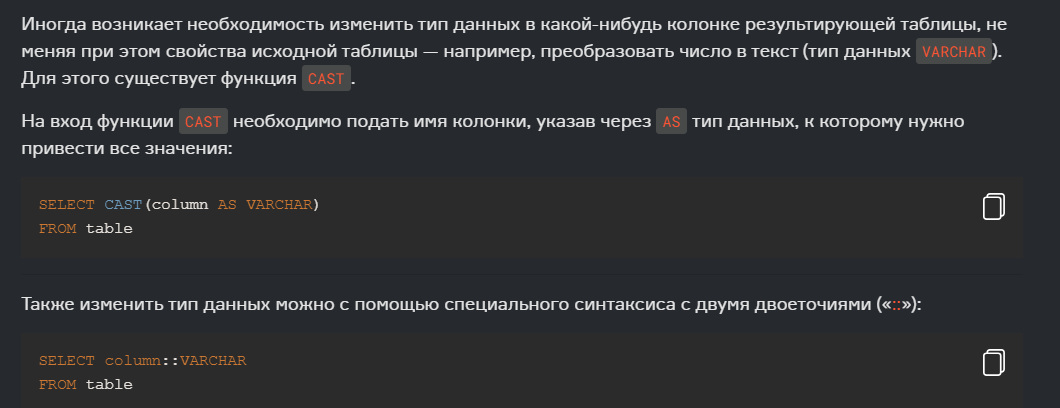

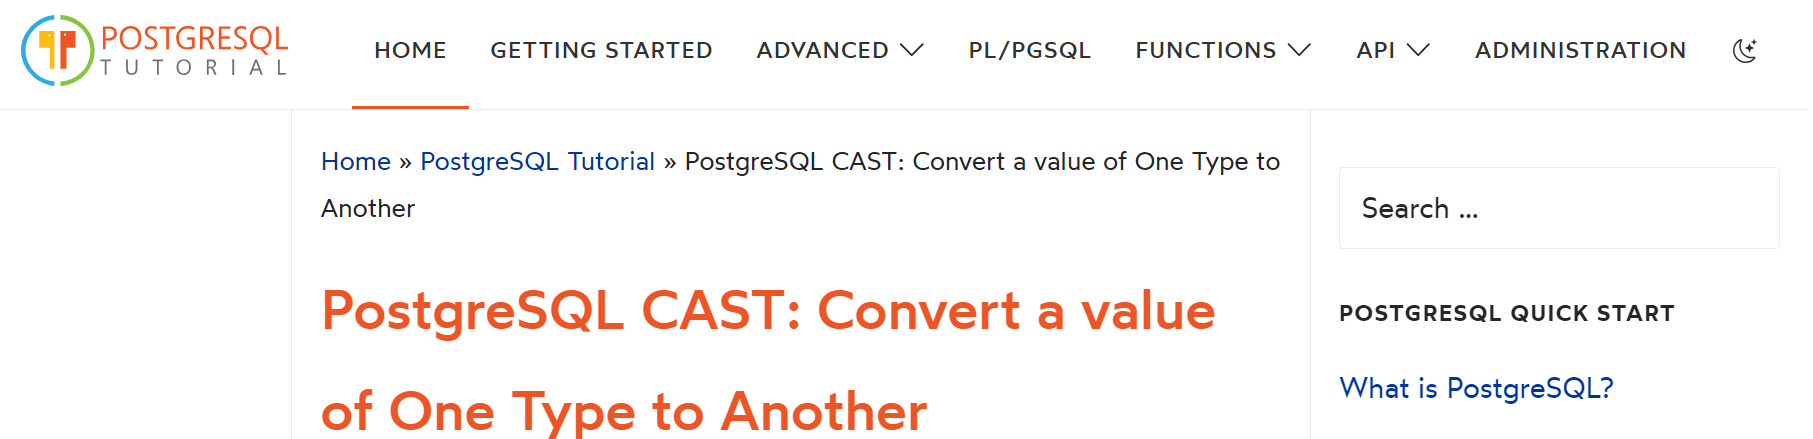

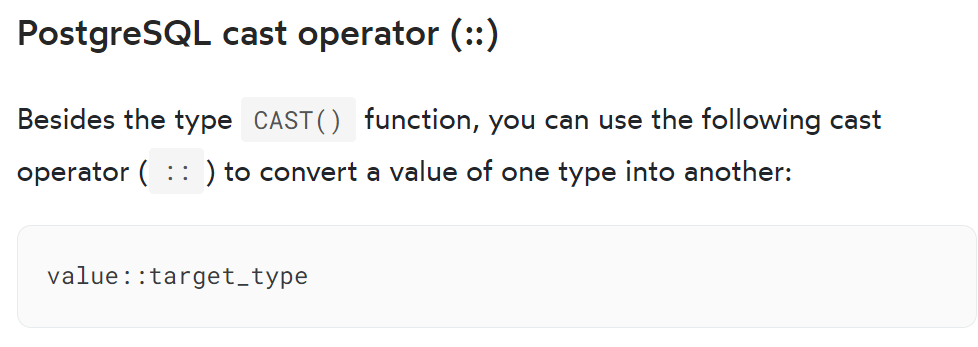

# <span style="color: red">Task 8:</span>
#### Change the type of the price column from the products table to VARCHAR. Display columns with the name of the goods, the price in the original format and the price in the VARCHAR format. Name the new column with the price in the new format price_char.
#### Sort the result in ascending order of the original product name in the name column. Do not limit the number of records displayed.
#### Field in the resulting table: **name, price, price_char**
```SQL
SELECT
  name,
  price,
  price::VARCHAR AS price_char  -- CAST(price AS VARCHAR)
FROM
  products
ORDER BY
  name ASC;
```

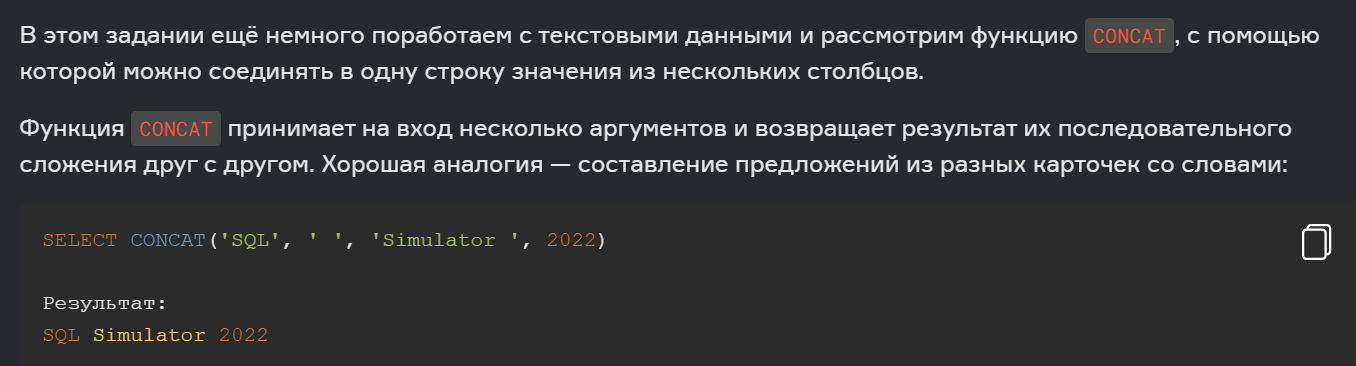

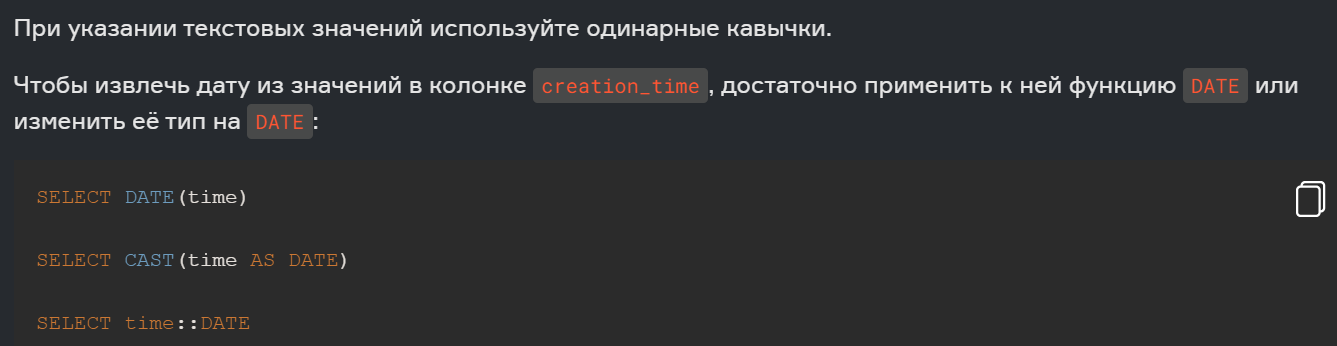